In [8]:
import os
import sys
import json

sys.path.append(os.path.abspath('.'))
import api

def read(path):
  with open(path) as f:
    return json.loads(f.read())

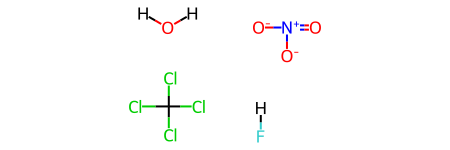

In [9]:
api.json_to_mol(read('test/author.json'))

In [10]:
api.validate(read('test/invalid.json')), api.validate(read('test/author.json'))

(False, True)

In [11]:
api.compare(read('test/cis.json'), read('test/trans.json'))

False

In [12]:
api.compare(read('test/author.json'), read('test/faulty2.json'))

False

In [13]:
api.compare(read('test/isomer1.json'), read('test/isomer2.json'))

False

In [14]:
api.compare(read('test/isomer1.json'), read('test/isomer2.json'), False)

True